In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [10]:
import os
for dirname, _, filenames in os.walk('/home/jle_linux/toy data/best_pose_58263e34-a45c-11ee-88ec-eb6a8d5269b4(in).csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [11]:
df = pd.read_csv('/home/jle_linux/toy data/best_pose_58263e34-a45c-11ee-88ec-eb6a8d5269b4(in).csv')

In [12]:
df.head()

,Unnamed: 0,time,heightStdDev,longitudeStdDev,groupMetadataID,latitudeStdDev,differentialAge,longitude,solType,solutionAge,solStatus,latitude,numSatsInSolution
0,0,1.694450e+18,0.030676,0.012783,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.012411,1.0,-82.135228,NARROW_INT,0.0,SOL_COMPUTED,39.378104,14
1,0,1.694450e+18,0.218763,0.136896,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.080366,1.0,-82.143940,NARROW_INT,0.0,SOL_COMPUTED,39.382745,10
2,1,1.694450e+18,0.027027,0.013242,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.015331,1.0,-82.114507,NARROW_INT,0.0,SOL_COMPUTED,39.329850,13
3,0,1.694450e+18,0.021111,0.010912,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.011871,1.0,-82.127983,NARROW_INT,0.0,SOL_COMPUTED,39.330354,15
4,0,1.694450e+18,0.019266,0.008685,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.010546,1.0,-82.105102,NARROW_INT,0.0,SOL_COMPUTED,39.320441,15


In [13]:
df.columns

Index(['Unnamed: 0', 'time', 'heightStdDev', 'longitudeStdDev',
       'groupMetadataID', 'latitudeStdDev', 'differentialAge', 'longitude',
       'solType', 'solutionAge', 'solStatus', 'latitude', 'numSatsInSolution'],
      dtype='object')

In [15]:
df.info

<bound method DataFrame.info of       Unnamed: 0          time  heightStdDev  longitudeStdDev  \
0              0  1.694450e+18      0.030676         0.012783   
1              0  1.694450e+18      0.218763         0.136896   
2              1  1.694450e+18      0.027027         0.013242   
3              0  1.694450e+18      0.021111         0.010912   
4              0  1.694450e+18      0.019266         0.008685   
...          ...           ...           ...              ...   
2006           0  1.694450e+18      0.062004         0.022711   
2007           1  1.694450e+18      0.016026         0.007843   
2008           2  1.694450e+18      0.523547         0.455607   
2009           3  1.694450e+18      0.024745         0.011439   
2010           0  1.694450e+18      3.268128         1.926293   

                           groupMetadataID  latitudeStdDev  differentialAge  \
0     58263e34-a45c-11ee-88ec-eb6a8d5269b4        0.012411              1.0   
1     58263e34-a45c-11ee-88ec

In [16]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0          time  heightStdDev  longitudeStdDev  \
0              0  1.694450e+18      0.030676         0.012783   
1              0  1.694450e+18      0.218763         0.136896   
2              1  1.694450e+18      0.027027         0.013242   
3              0  1.694450e+18      0.021111         0.010912   
4              0  1.694450e+18      0.019266         0.008685   
...          ...           ...           ...              ...   
2006           0  1.694450e+18      0.062004         0.022711   
2007           1  1.694450e+18      0.016026         0.007843   
2008           2  1.694450e+18      0.523547         0.455607   
2009           3  1.694450e+18      0.024745         0.011439   
2010           0  1.694450e+18      3.268128         1.926293   

                           groupMetadataID  latitudeStdDev  differentialAge  \
0     58263e34-a45c-11ee-88ec-eb6a8d5269b4        0.012411              1.0   
1     58263e34-a45c-11ee-88

In [17]:
df.isnull().sum #looking for null values 

<bound method DataFrame.sum of       Unnamed: 0   time  heightStdDev  longitudeStdDev  groupMetadataID  \
0          False  False         False            False            False   
1          False  False         False            False            False   
2          False  False         False            False            False   
3          False  False         False            False            False   
4          False  False         False            False            False   
...          ...    ...           ...              ...              ...   
2006       False  False         False            False            False   
2007       False  False         False            False            False   
2008       False  False         False            False            False   
2009       False  False         False            False            False   
2010       False  False         False            False            False   

      latitudeStdDev  differentialAge  longitude  solType  solutionA

In [19]:
plt.figure(1 , figsize = (15 , 7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

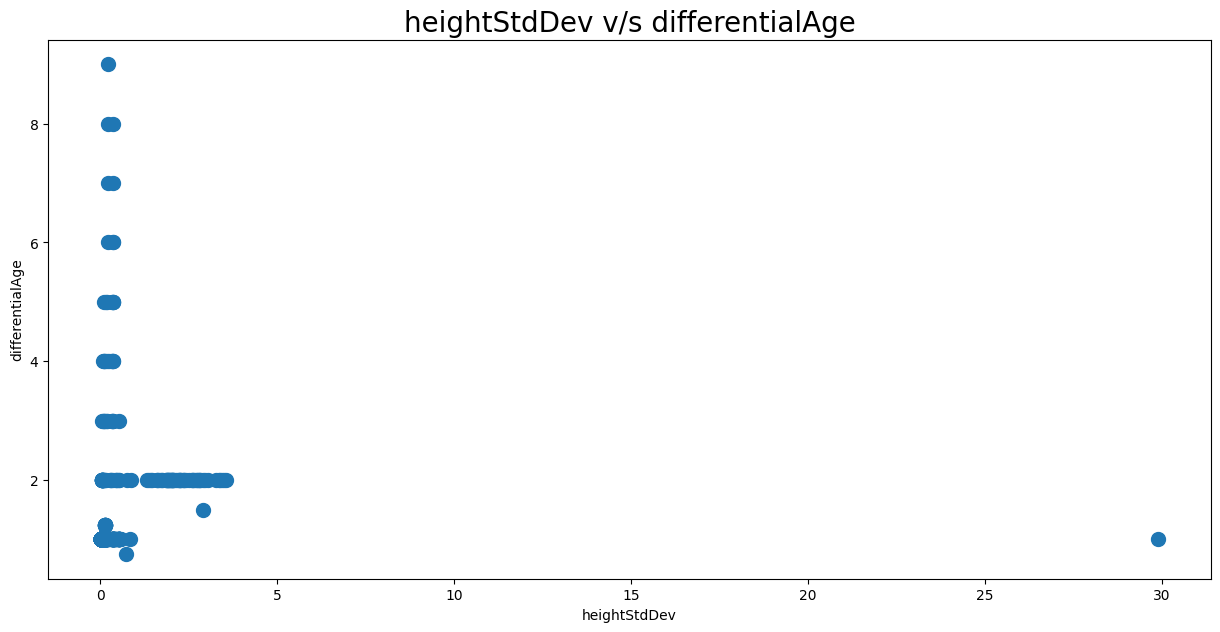

In [22]:
plt.figure(1 , figsize = (15 , 7))
plt.title('heightStdDev v/s differentialAge', fontsize = 20)
plt.xlabel('heightStdDev')
plt.ylabel('differentialAge')
plt.scatter( x = 'heightStdDev', y = 'differentialAge', data = df, s = 100)
plt.show()

In [23]:
X1 = df[['differentialAge' , 'heightStdDev']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

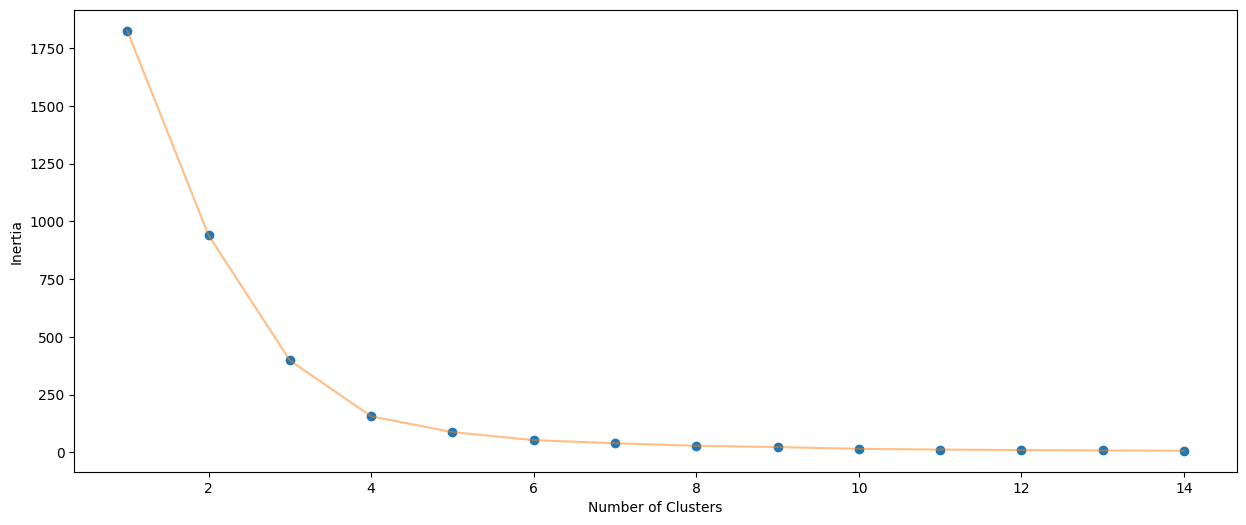

In [25]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [26]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [27]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

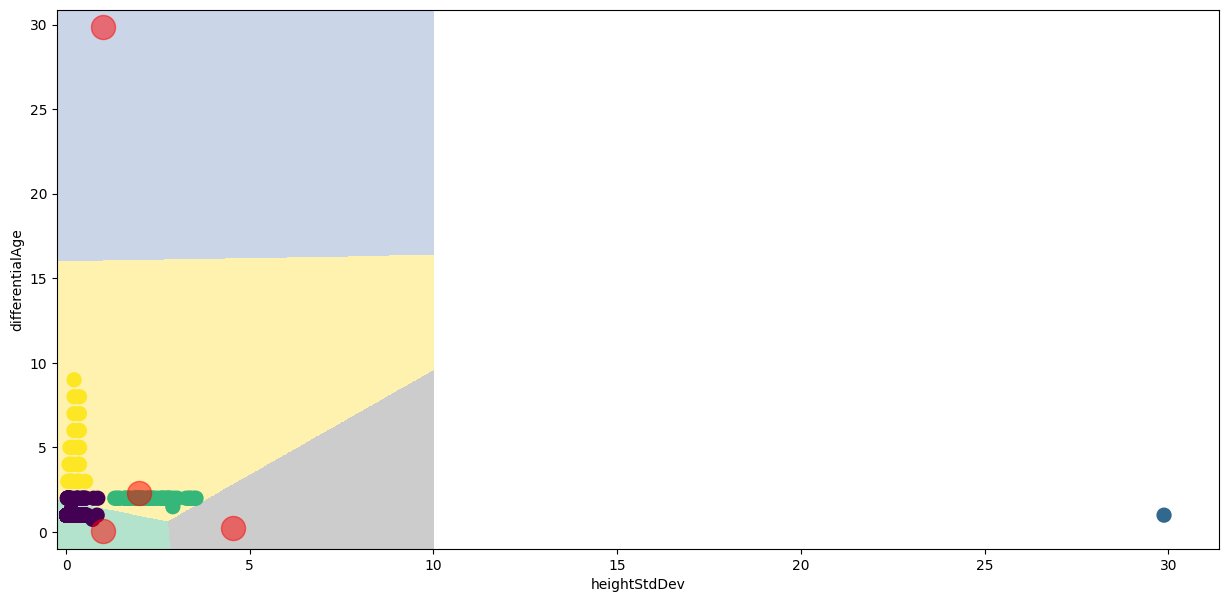

In [29]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'heightStdDev', y = 'differentialAge', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('differentialAge') , plt.xlabel('heightStdDev')
plt.show()